<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day6_Embedded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset (First 5 Rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


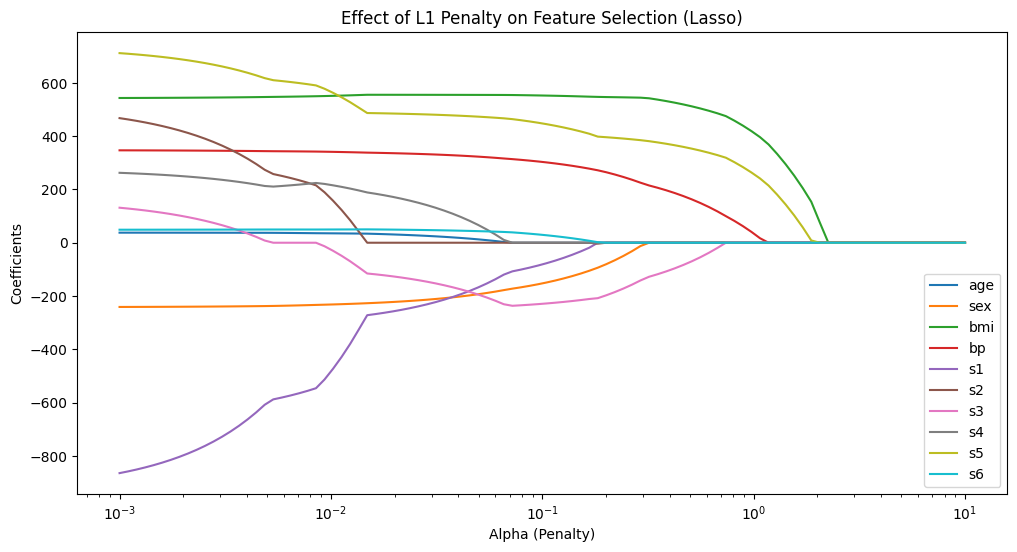

Selected Features with Lasso Regularization (Alpha = 0.1):
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display the original dataset
print("Original Dataset (First 5 Rows):")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values, generates a sequence of 100 values logarithmically spaced between 10^-3, and 10^1
lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Plot the effect of penalty on Lasso coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L1 Penalty on Feature Selection (Lasso)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature selection with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
lasso = Lasso(alpha=chosen_alpha, max_iter=10000)
lasso.fit(X_train, y_train)

selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features with Lasso Regularization (Alpha = 0.1):")
print(selected_features.tolist())


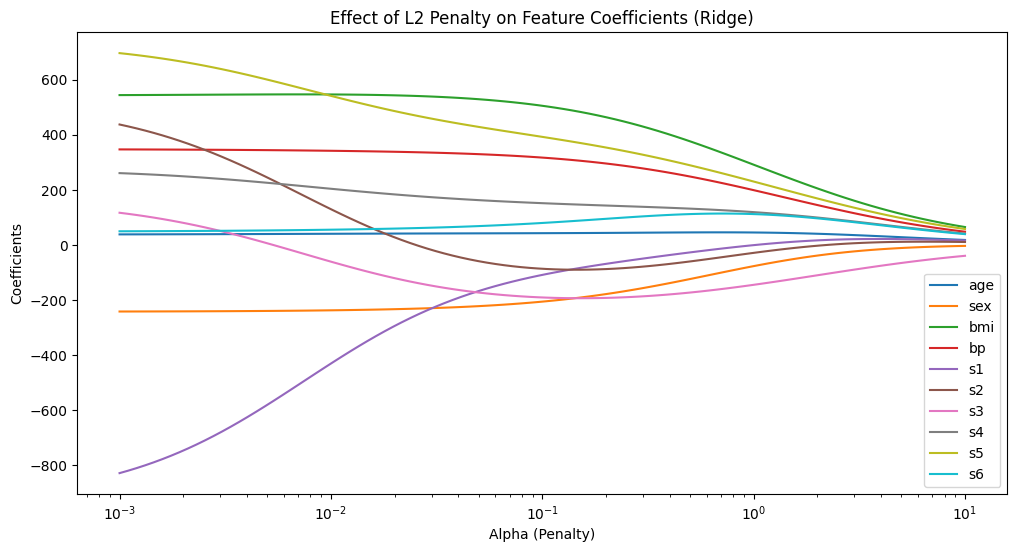

Ridge Coefficients with Regularization (Alpha = 0.1):
age: 42.8557
sex: -205.4943
bmi: 505.0890
bp: 317.0932
s1: -108.5003
s2: -86.2367
s3: -190.3632
s4: 151.7071
s5: 392.2893
s6: 79.9082


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Plot the effect of penalty on Ridge coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L2 Penalty on Feature Coefficients (Ridge)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature analysis with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
ridge = Ridge(alpha=chosen_alpha, max_iter=10000)
ridge.fit(X_train, y_train)

print("Ridge Coefficients with Regularization (Alpha = 0.1):")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")


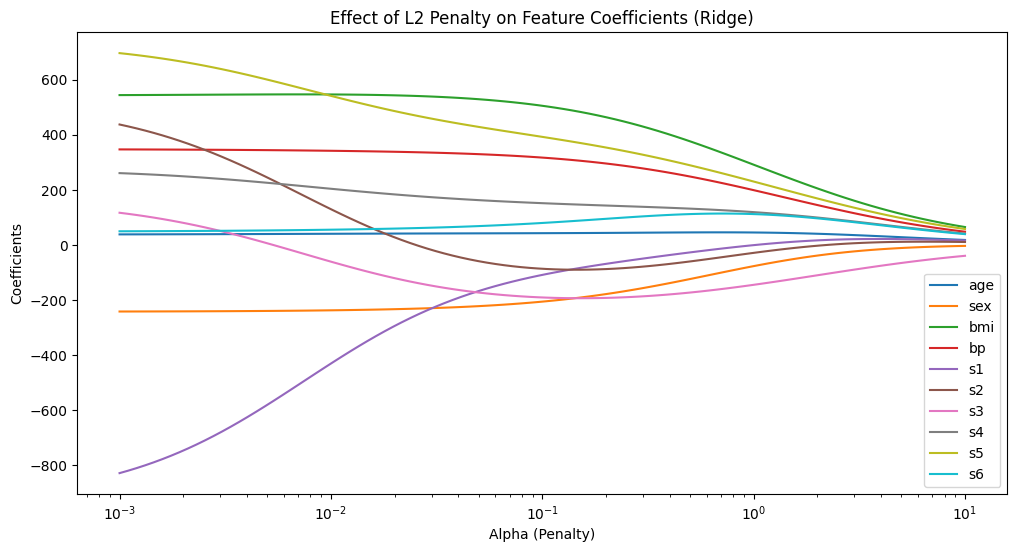

Selected Features with Ridge Regularization (Alpha = 0.1, Threshold = 101.01780660792977):
['sex', 'bmi', 'bp', 's1', 's3', 's4', 's5']

Feature Coefficients:
age: 42.8557 (Removed)
sex: -205.4943 
bmi: 505.0890 
bp: 317.0932 
s1: -108.5003 
s2: -86.2367 (Removed)
s3: -190.3632 
s4: 151.7071 
s5: 392.2893 
s6: 79.9082 (Removed)


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Plot the effect of penalty on Ridge coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L2 Penalty on Feature Coefficients (Ridge)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature analysis with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
ridge = Ridge(alpha=chosen_alpha, max_iter=10000)
ridge.fit(X_train, y_train)

# Define a threshold for removing features
threshold = 0.1 * max(abs(coefficients)) # Adjust based on domain knowledge or analysis
coefficients = ridge.coef_
selected_features = X.columns[np.abs(coefficients) > threshold]

print(f"Selected Features with Ridge Regularization (Alpha = {chosen_alpha}, Threshold = {threshold}):")
print(selected_features.tolist())

print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f} {'(Removed)' if abs(coef) <= threshold else ''}")


Original Dataset (First 5 Rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
Selected Features with Decision Tree (Threshold = 0.05):
['bmi', 's1', 's5', 's6']

Feature Importances:
age: 0.0315 (Removed)
sex: 0.0018 (Removed)
bmi: 0.5550 
bp: 0.0220 (Removed)
s1: 0.0616 
s2: 0.0166 (Removed)
s3: 0.0230 (Removed)
s4: 0.0400 (Removed)
s5: 0.1891 
s6: 0.0595 


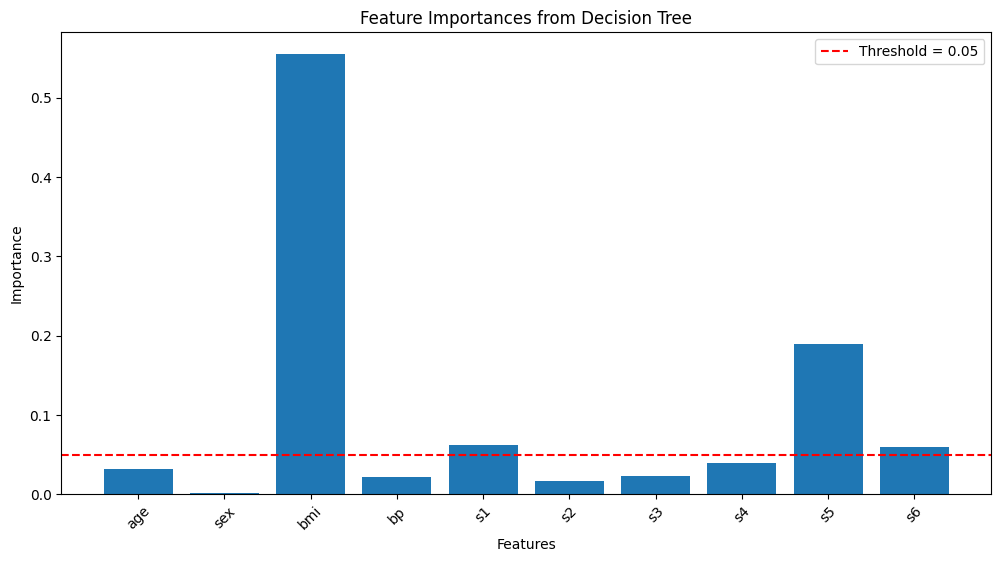

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display the original dataset
print("Original Dataset (First 5 Rows):")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor for Embedded Feature Selection
# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth can be adjusted
tree.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree.feature_importances_

# Define a threshold for importance
threshold = 0.05  # Adjust based on analysis
selected_features_tree = X.columns[feature_importances > threshold]

# Print Selected Features and their Importances
print(f"Selected Features with Decision Tree (Threshold = {threshold}):")
print(selected_features_tree.tolist())

print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f} {'(Removed)' if importance <= threshold else ''}")

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_importances)
plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.xticks(rotation=45)
plt.legend()
plt.show()
